<a href="https://colab.research.google.com/github/cedro3/CodeFormer/blob/master/CodeFormer_movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title **セットアップ**

# Clone CodeFormer and enter the CodeFormer folder
%cd /content
!rm -rf CodeFormer
!git clone https://github.com/cedro3/CodeFormer.git
%cd CodeFormer

# Set up the environment
# Install python dependencies
!pip install -r requirements.txt
# Install basicsr
!python basicsr/setup.py develop

# Download the pre-trained model
!python scripts/download_pretrained_models.py facelib
!python scripts/download_pretrained_models.py CodeFormer

# Define function
from function import *

# make dir
! mkdir download

/content
Cloning into 'CodeFormer'...
remote: Enumerating objects: 375, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 375 (delta 78), reused 66 (delta 47), pack-reused 239
Receiving objects: 100% (375/375), 12.51 MiB | 18.33 MiB/s, done.
Resolving deltas: 100% (139/139), done.
/content/CodeFormer
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.9 MB 28.3 MB/s 
     |████████████████████████████████| 190 kB 68.5 MB/s 
     |████████████████████████████████| 53 kB 2.4 MB/s 
running develop
running egg_info
creating basicsr.egg-info
writing basicsr.egg-info/PKG-INFO
writing dependency_links to basicsr.egg-info/dependency_links.txt
writing requirements to basicsr.egg-info/requires.txt
writing top-level names to basicsr.egg-info/top_level.txt
writing manifest file 'basicsr.egg-info/SOURCES.txt'
adding license file 'LICENSE'
writin

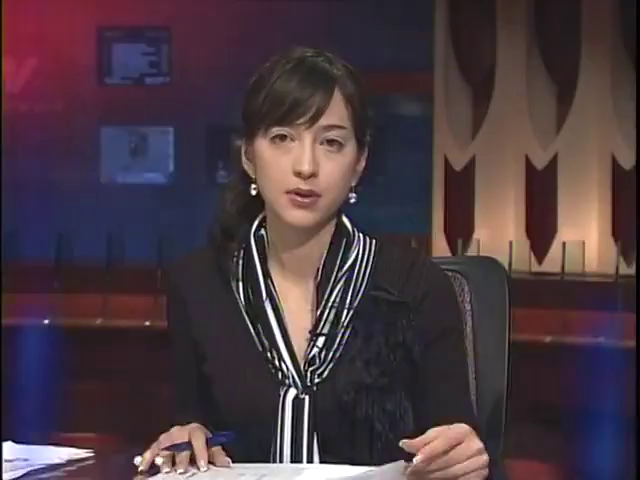

fps =  29.97002997002997
frames =  174
interval =  1


In [2]:
#@title **動画の読み込み**

#@markdown ■movie フォルダに音声付き動画（mp4）をアップロードして下さい\
#@markdown ■60秒以内（30fpsの場合）として下さい

# 設定
video = '01.mp4' #@param {type:"string"}
video_file = 'movie/'+video
image_dir='inputs/frame/'
image_file='%s.png'

# video_2_images
reset_folder('inputs/frame')
fps, i, interval = video_2_images(video_file, image_dir, image_file)

# スタートフレーム表示
from google.colab.patches import cv2_imshow
img = cv2.imread('inputs/frame/000000.png')
cv2_imshow(img)

# パラメータ表示
print('fps = ', fps)
print('frames = ', i)
print('interval = ', interval)

In [3]:
#@title **高画質化**
#import os
#import shutil
#from PIL import Image
#@markdown　■処理時間は1秒(30fps）の動画で１分程度かかります
input_folder = 'inputs/frame'
w = 0.7 #@param {type:"slider", min:0.1, max:0.9, step:0.1}

! python inference_codeformer.py --w $w\
                                  --test_path $input_folder\
                                  --bg_upsampler realesrgan\
                                  --face_upsample
# ログ・クリア
clear_output()

# 動画の作成
print('makeing movie...')
fps_r = fps/interval
file_path = 'results/frame_'+str(w)+'/final_results/%06d.png'
! ffmpeg -y -r $fps_r -i $file_path -vcodec libx264 -pix_fmt yuv420p -loglevel error out.mp4

# 音声の抽出・付加
print('preparation for sound...')
! ffmpeg -y -i $video_file -loglevel error sound.mp3
! ffmpeg -y -i out.mp4 -i sound.mp3 -loglevel error output.mp4

# 動画の再生
print('waiting for play movie...')
display_mp4('output.mp4')

makeing movie...
preparation for sound...
waiting for play movie...


In [ ]:
#@title **ダウンロード**
#@markdown ■google chrome 専用
from google.colab import files
import shutil

dst_filepath = 'download/'+os.path.splitext(video)[0]+'_s.mp4'
shutil.copy('output.mp4', dst_filepath)
files.download(dst_filepath)